In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
import seaborn as sns
import cv2
import pathlib
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_jsons"

In [5]:
%cd /content/drive/MyDrive/kaggle_jsons

/content/drive/MyDrive/kaggle_jsons


In [ ]:
!ls

drive  sample_data


In [ ]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/drive/MyDrive/kaggle_jsons. Or use the environment method.


In [ ]:
!ls

drive  sample_data


In [6]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

In [8]:
dataset_folder = '/content/drive/MyDrive/kaggle_jsons'
datasetObject = pd.read_csv(os.path.join(dataset_folder, "train.csv"))
datasetObject.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [9]:
imagesDataset = pathlib.Path(os.path.join(dataset_folder, "images"))
listImages = list(imagesDataset.glob("*.*"))

(100, 100) (1365, 2048, 3)


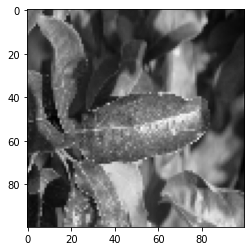

In [33]:

img = cv2.imread(str(listImages[0]))

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_image = gray_image/255.0
gray_image = cv2.resize(gray_image, (100, 100))
plt.imshow(gray_image, cmap='gray')

print(f'{gray_image.shape} {img.shape}')

plt.show()

In [36]:
all_images = []
for i in range(0, len(listImages)):
  img = cv2.imread(str(listImages[i]))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (100, 100))
  all_images.append(img)

In [72]:
temp = []
for i in range(1821, len(all_images)):
  temp.append(all_images[i])
print(len(temp))
all_images = temp

1821


In [73]:
healthy = 0
rust = 0
multi = 0
scab = 0
Values = datasetObject.values
for i in range(0, len(Values)):
  if Values[i][1] == 1:
    healthy+=1
  if Values[i][2] == 1:
    multi+=1
  if Values[i][3] == 1:
    rust+=1
  if Values[i][4] == 1:
    scab+=1
print(f'{scab} {rust} {healthy} {multi}')  

592 622 516 91


In [78]:
type(all_images)

list

In [81]:
all_images = np.asarray(all_images)
type(all_images)
all_images.shape

(1821, 100, 100)

In [74]:
labels = []
disease = ['healthy', 'multi', 'rust', 'scab']
for i in range(0, len(Values)):
  #healthy
  if Values[i][1] == 1:
    labels.append(0)
  
  #multi disease
  if Values[i][2] == 1:
    labels.append(1)
  
  #rust
  if Values[i][3] == 1:
    labels.append(2)
  #scab
  if Values[i][4] == 1:
    labels.append(3)

In [75]:
print(len(labels))
print(labels)

1821
[3, 1, 0, 2, 0, 0, 1, 3, 3, 0, 2, 3, 3, 0, 2, 2, 3, 3, 0, 3, 3, 2, 3, 2, 0, 1, 2, 3, 3, 3, 3, 2, 3, 0, 2, 2, 1, 2, 2, 2, 3, 3, 3, 0, 3, 2, 0, 2, 3, 3, 2, 3, 3, 0, 0, 0, 3, 2, 2, 2, 2, 3, 1, 0, 2, 3, 0, 0, 0, 2, 0, 2, 0, 3, 1, 2, 3, 0, 3, 3, 3, 2, 2, 3, 3, 3, 0, 2, 0, 2, 0, 3, 2, 2, 0, 1, 2, 2, 2, 0, 0, 3, 2, 0, 1, 0, 3, 3, 2, 2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 0, 2, 3, 2, 3, 1, 2, 3, 2, 2, 2, 0, 0, 0, 0, 3, 2, 3, 2, 3, 3, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 0, 3, 3, 2, 0, 1, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 0, 3, 3, 0, 0, 3, 0, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 0, 3, 0, 3, 3, 2, 0, 0, 0, 3, 2, 0, 2, 2, 0, 2, 3, 3, 1, 3, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 2, 1, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 3, 0, 3, 2, 3, 0, 3, 0, 0, 0, 0, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 2, 0, 3, 3, 0, 2, 0, 2, 2, 3, 0, 3, 1, 0, 3, 3, 3, 0, 3, 2, 2, 3, 3, 0, 2, 3, 0, 2, 2, 2, 3, 3, 3, 2, 2, 0, 0, 2

In [82]:
#normalization
#uncomment for the first time only 
#all_images = all_images /255.0

In [93]:
#returning the numpy array to a list again after normalization
all_images = list(all_images)

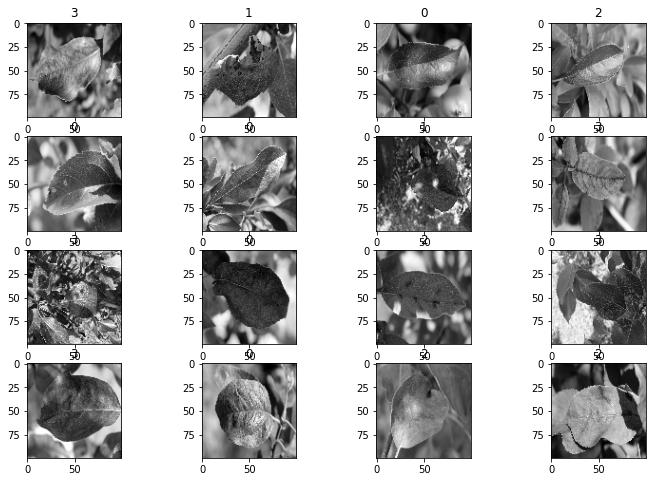

In [94]:
plt.figure(figsize = (12, 8))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(all_images[i], cmap='gray')
  plt.title(labels[i])
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images, labels, test_size = 0.15, random_state = 42)

In [102]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [105]:
#model Architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(100, 100)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(4, activation='softmax') # output layer (3)
])


In [108]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
#x_test=x_test.reshape((-1,10000))
#x_train=x_train.reshape((-1, 10000))

In [99]:
print(x_test[0])

[[0.49019608 0.49803922 0.45882353 ... 0.91372549 0.91372549 0.90980392]
 [0.50980392 0.50196078 0.48235294 ... 0.90588235 0.91372549 0.90980392]
 [0.52156863 0.50588235 0.48627451 ... 0.90588235 0.90980392 0.90588235]
 ...
 [0.31372549 0.25882353 0.19607843 ... 0.28235294 0.31764706 0.58039216]
 [0.38039216 0.3254902  0.23529412 ... 0.26666667 0.27843137 0.28235294]
 [0.43137255 0.38431373 0.27843137 ... 0.28627451 0.27058824 0.26666667]]


In [109]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100, restore_best_weights=True,)

history= model.fit(
      x_train,
      y_train,
      epochs=256,
      shuffle=True,
      validation_data=(x_test, y_test),verbose=1,
      callbacks=[callback],
      batch_size = 16
    )

Epoch 1/256
97/97 [==============================] - 1s 9ms/step - loss: 1.1165 - accuracy: 0.4906 - val_loss: 1.3913 - val_accuracy: 0.2993
Epoch 2/256
97/97 [==============================] - 1s 9ms/step - loss: 1.2130 - accuracy: 0.4370 - val_loss: 1.2737 - val_accuracy: 0.3540
Epoch 3/256
97/97 [==============================] - 1s 8ms/step - loss: 1.1521 - accuracy: 0.4480 - val_loss: 1.3089 - val_accuracy: 0.2847
Epoch 4/256
97/97 [==============================] - 1s 8ms/step - loss: 1.1663 - accuracy: 0.4189 - val_loss: 1.3356 - val_accuracy: 0.2920
Epoch 5/256
97/97 [==============================] - 1s 8ms/step - loss: 1.1617 - accuracy: 0.4189 - val_loss: 1.2772 - val_accuracy: 0.2883
Epoch 6/256
97/97 [==============================] - 1s 8ms/step - loss: 1.1601 - accuracy: 0.4176 - val_loss: 1.2789 - val_accuracy: 0.2956
Epoch 7/256
97/97 [==============================] - 1s 8ms/step - loss: 1.1250 - accuracy: 0.4518 - val_loss: 1.2857 - val_accuracy: 0.2956
Epoch 8/256
9